# Sequenzdiagramme mit Jupyter Notebook und plantuml

von Christian Kubisch


Damit UML-Diagramme erstellt werden können, muss vorher plantuml importiert werden.

In [3]:
import plantuml

## Wie wird ein Diagramm dargestellt?
    
Durch die Annotation `%%plantuml`wird der nächste Blog als UML Diagramm dargestellt.

Die vollständige Doku zu Sequenzdiagrammen ist unter
https://plantuml.com/de/sequence-diagram
zu finden.

## Nachrichten
Die Reihenfolge der Nachrichten entspreicht ihrer Deklaration  

`->`   Nachricht zwischen zwei Teilnehmern  

`<-` ist auch möglich und erlaubt eine bessere Lesbarkeit

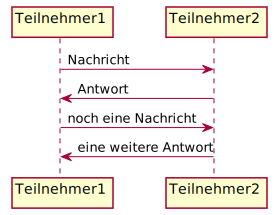

In [24]:
%%plantuml
Teilnehmer1 -> Teilnehmer2: Nachricht
Teilnehmer2 -> Teilnehmer1: Antwort

Teilnehmer1 -> Teilnehmer2: noch eine Nachricht
Teilnehmer1 <- Teilnehmer2: eine weitere Antwort

Es sind auch Nachrichten an sich selbst möglich.

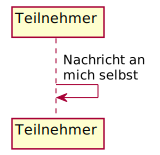

In [19]:
%%plantuml
Teilnehmer -> Teilnehmer: Nachricht an \nmich selbst

## Deklaration eines Teilnehmers
Die reihenfolge im Diagramm ist abhängig von der Reihenfolge der Deklaration.  
Das Schlüsselwort ``order`` funktioniert in Jupyter Notebook nicht.  

Folgende Schlüsselwörter deklarieren einen Teilnehmer  
* ``actor``
* ``boundary``
* ``control``
* ``entity``
* ``database``
* ``collections``
* ``queue``

Teilnehmer können mittels ``as`` umbenannt werden.  
Für die Verwendung von nicht-alphanumerischen Zeichen (Klammern oder Zeilenumbrüche) müssen Anführungszeichen bei der Deklaration verwendet werden.

Teilnehmer müssen nicht explizit deklariert werden.  

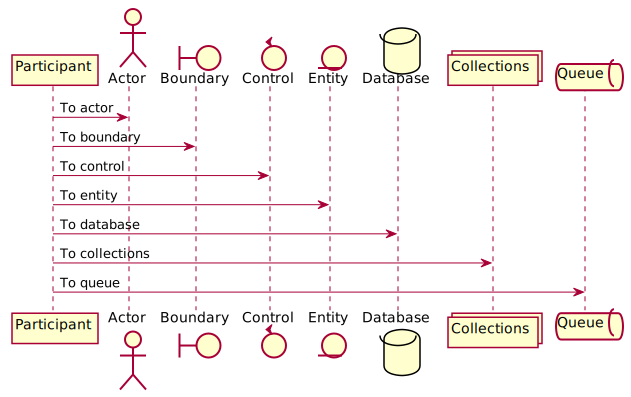

In [10]:
%%plantuml
participant Participant as Foo
actor       Actor       as Foo1
boundary    Boundary    as Foo2
control     Control     as Foo3
entity      Entity      as Foo4
database    Database    as Foo5
collections Collections as Foo6
queue       Queue       as Foo7
Foo -> Foo1 : To actor 
Foo -> Foo2 : To boundary
Foo -> Foo3 : To control
Foo -> Foo4 : To entity
Foo -> Foo5 : To database
Foo -> Foo6 : To collections
Foo -> Foo7: To queue

## Pfeilarten

- ``->`` normale Nachricht
- ``->x`` verloren gegangene Nachricht
- ``-\`` oder ``-/`` nur die jeweils halbe Pfeilspitze
- ``->>`` oder ``-//`` eine dünne Pfeilspitze
- ``-->`` gestrichelter Pfeil
- ``->o`` Kreis am Ende
- ``<->`` beidseitiger Pfeil
- ``-[#blue]>`` farbiger Pfeil
- ``-[#0000ff]>`` farbiger Pfeil

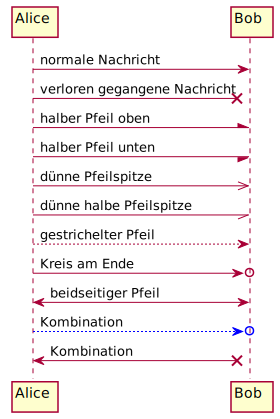

In [46]:
%%plantuml
Alice -> Bob: normale Nachricht
Alice ->x Bob: verloren gegangene Nachricht
Alice -\ Bob:  halber Pfeil oben
Alice -/ Bob:  halber Pfeil unten
Alice ->> Bob:  dünne Pfeilspitze
Alice -// Bob:  dünne halbe Pfeilspitze
Alice --> Bob:  gestrichelter Pfeil
Alice ->o Bob:  Kreis am Ende
Alice <-> Bob:  beidseitiger Pfeil
Alice -[#blue]->o Bob: Kombination
Alice <->x Bob: Kombination

## Farben, Zeilenumbrüche und Kommentare:

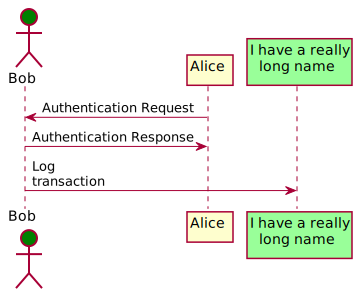

In [40]:
%%plantuml
actor Bob #green
' The only difference between actor
'and participant is the drawing
participant Alice
participant "I have a really\nlong name" as L #99FF99
/' You can also declare:
   participant L as "I have a really\nlong name"  #99FF99
  '/

Alice->Bob: Authentication Request
Bob->Alice: Authentication Response
Bob->L: Log \ntransaction

## Textausrichtung
``skinparam`` erlaubt diverse weitere Einstellungen siehe: https://plantuml.com/de/skinparam  

* sequenceMessageAlign ``left``, ``right``, ``center``, ``direction`` oder ``reverseDirection``

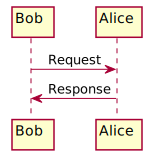

In [23]:
%%plantuml
skinparam sequenceMessageAlign right
Bob -> Alice : Request
Alice -> Bob : Response

## Gruppierung von Nachrichten

### Seiten

Das ``newpage`` Schlüsselwort wird verwendet, um ein Diagramm in mehrere Bilder aufzuteilen.
Man kann den Titel der neuen Seite direkt hinter dem newpage Schlüsselwort angeben.

Funktioniert wirklich z.B. bei der Einbindung in Word, dargestellt wird nur die erste Seite.

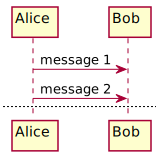

In [48]:
%%plantuml
Alice -> Bob : message 1
Alice -> Bob : message 2

newpage

Alice -> Bob : message 3
Alice -> Bob : message 4

newpage A title for the\nlast page

Alice -> Bob : message 5
Alice -> Bob : message 6

### Gruppierung

Nachrichten können mit den folgenden Schlüsselwörtern gruppiert werden:
* ``alt/else``
* ``opt``
* ``loop``
* ``par``
* ``break``
* ``critical``
* ``group``, gefolgt von einem anzuzeigenden Text und [Titeltext]

Es ist möglich einen Text anzugeben, der im Titel angezeigt werden soll.  
Das ``end`` Schlüsselwort beendet eine Gruppe  

Gruppen können geschachtelt werden!


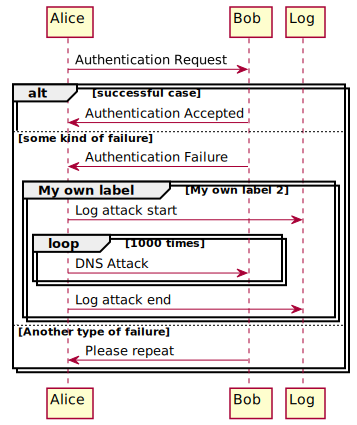

In [50]:
%%plantuml
Alice -> Bob: Authentication Request

alt successful case

    Bob -> Alice: Authentication Accepted

else some kind of failure

    Bob -> Alice: Authentication Failure
    group My own label [My own label 2]
    Alice -> Log : Log attack start
        loop 1000 times
            Alice -> Bob: DNS Attack
        end
    Alice -> Log : Log attack end
    end

else Another type of failure

   Bob -> Alice: Please repeat

end

### Schritte
Bei Bedarf kann ein Diagramm mit dem "``==``" Separator in logische Schritte unterteilt werden.

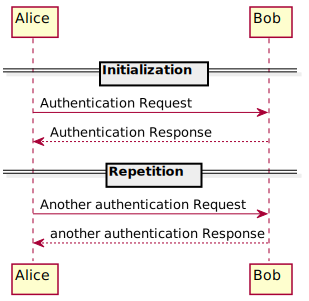

In [52]:
%%plantuml
== Initialization ==

Alice -> Bob: Authentication Request
Bob --> Alice: Authentication Response

== Repetition ==

Alice -> Bob: Another authentication Request
Alice <-- Bob: another authentication Response

### Verzögerungen

Mit ``...`` kann man eine Verzögerung in dem Diagramm anzeigen. In dieser Verzögerung kann außerdem eine Nachricht angezeigt werden.

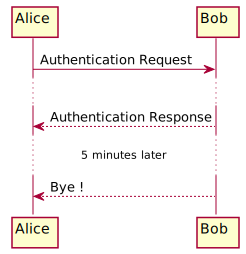

In [53]:
%%plantuml
Alice -> Bob: Authentication Request
...
Bob --> Alice: Authentication Response
...5 minutes later...
Bob --> Alice: Bye !

### Abstände


Mit  ``|||`` kann ein Abstand zwischen zwei Nachrichten eingefügt werden.

Außerdem ist es möglich, die Größe des Abstandes in Pixeln festzulegen.

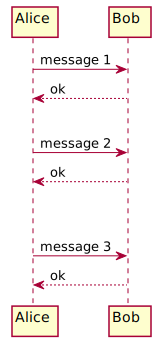

In [57]:
%%plantuml
Alice -> Bob: message 1
Bob --> Alice: ok
|||
Alice -> Bob: message 2
Bob --> Alice: ok
||45||
Alice -> Bob: message 3
Bob --> Alice: ok

## Notizen

Notizen zu einer Nachricht werden mit dem Schlüsselwort ``note left`` (links) oder ``note right`` (rechts) gleich nach der Nachricht eingeleitet.  
Soll die Notiz mehrere Zeilen umfassen, muss das Schlüsselwort ``end note`` am Ende der Notiz verwendet werden.

Weitere Positionierungen und Formveränderungen siehe PlantUML Doku.

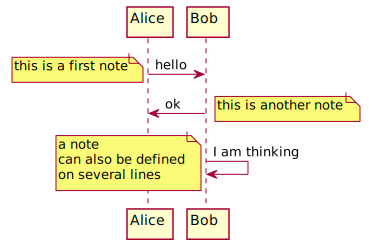

In [51]:
%%plantuml
Alice->Bob : hello
note left: this is a first note

Bob->Alice : ok
note right: this is another note

Bob->Bob : I am thinking
note left
a note
can also be defined
on several lines
end note

## Lebenslinien

Mit den Befehlen ``activate`` und ``deactivate`` können die Teilnehmer
aktiviert und deaktiviert werden.

Wenn ein Teilnehmer aktiviert wurde, dann erscheint seine Lebenlinie.

Die Befehle ``activate`` und ``deactivate`` wirken nach der vorhergehenden
Nachricht.

Der Befehl ``destroy`` beendet die Lebenslinie eines Teilnehmers.  
alternativ kann der Befehl ``return (message)`` verwendet werden.


Es ist auch möglich, geschachtelte Lebenslinien zu erzeugen. Außerdem kann man einer Lebenslinie eine [Farbe](color) zuweisen.

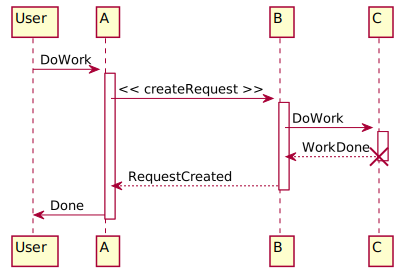

In [55]:
%%plantuml
participant User

User -> A: DoWork
activate A

A -> B: << createRequest >>
activate B

B -> C: DoWork
activate C
C --> B: WorkDone
destroy C

B --> A: RequestCreated
deactivate B

A -> User: Done
deactivate A

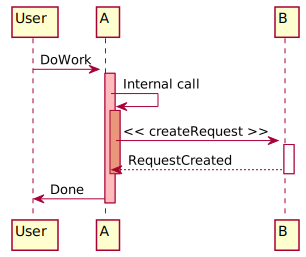

In [56]:
%%plantuml
participant User

User -> A: DoWork
activate A #FFBBBB

A -> A: Internal call
activate A #DarkSalmon

A -> B: << createRequest >>
activate B

B --> A: RequestCreated
deactivate B
deactivate A
A -> User: Done
deactivate A